In [3]:
%precision 2
%load_ext autoreload
%autoreload 2
%run setup.py

Everything is now installed. You can proceed. 


<a id="fit-of-the-transfer-function"></a>
### Fit of the Transfer Function 

First we have to run the simulations of the single neurons. 

In the `tf_simulation` we can set:
1. the cell types - chosen from the file `cell_library.py` (we can add new parameters). To run parallel 2 different types of cells, run the script "`tf_simulation.py`", otherwise to run one single type of cells run the script "`tf_simulation_single_cell.py`"
2. the range of the inhibitory and excitatory input (in the form of [start, end, step])
3. the time of the simulation
4. the path (`save_path`) where the results will be saved, and a characteristic string to save in the names (`save_name`)

In [4]:
%run tf_simulation.py --help

WARNING    /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)
 [py.warnings]


2024-05-28 12:33:27,516 - WARNING - py.warnings - /DATA/Maria/anaconda3/lib/python3.9/site-packages/tvb/datatypes/surfaces.py:60: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)

usage: tf_simulation.py [-h] [--cells CELLS] [--range_inh RANGE_INH]
                        [--range_exc RANGE_EXC] [--time TIME]
                        [--save_name SAVE_NAME]

optional arguments:
  -h, --help            show this help message and exit
  --cells CELLS         cell types of the populations (default: FS-RS)
  --range_inh RANGE_INH
                        inhibitory input values (default: 0.1,30,60)
  --range_exc RANGE_EXC
                        excitatory input values (default: 0.1,30,60)
  --time TIME           Total Time of simulation (ms) (default: 10000)
  --save_name SAVE_NAME
                        name to save (default: trial)


In [ ]:
# Now making the numerical simulations at various levels of both excitatory and inhibitory inputs
%run tf_simulation.py --cells FS-RS --range_inh 0.1,30,50 --range_exc 0.1,30,50 --time 4000 


rate exc = 0.1
rate inh = 0.1


WARNING    'Cm' is an internal variable of group 'neurongroup_2', but also exists in the run namespace with the value 200. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Cm' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 200. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


rate inh = 0.710204081632653


WARNING    'Cm' is an internal variable of group 'neurongroup_3', but also exists in the run namespace with the value 200. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'Cm' is an internal variable of group 'neurongroup_4', but also exists in the run namespace with the value 200. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


rate inh = 1.3204081632653062
rate inh = 1.9306122448979592
rate inh = 2.5408163265306123
rate inh = 3.1510204081632653
rate inh = 3.7612244897959184
rate inh = 4.371428571428571
rate inh = 4.981632653061224
rate inh = 5.591836734693877
rate inh = 6.20204081632653
rate inh = 6.812244897959183
rate inh = 7.422448979591836
rate inh = 8.03265306122449
rate inh = 8.642857142857142
rate inh = 9.253061224489796
rate inh = 9.863265306122448
rate inh = 10.4734693877551
rate inh = 11.083673469387755
rate inh = 11.693877551020408
rate inh = 12.30408163265306
rate inh = 12.914285714285713
rate inh = 13.524489795918367
rate inh = 14.13469387755102
rate inh = 14.744897959183673
rate inh = 15.355102040816325
rate inh = 15.965306122448979
rate inh = 16.575510204081635
rate inh = 17.185714285714287
rate inh = 17.79591836734694
rate inh = 18.406122448979595
rate inh = 19.016326530612247
rate inh = 19.6265306122449
rate inh = 20.23673469387755
rate inh = 20.846938775510203
rate inh = 21.45714285714286
r

Fit the Transfer Function to the data. Separate fits need to be made for each type of cells. 

To set the parameters of the fit, check the documentation strings of the function `make_fit_from_data` 

Fit first the one type of cell and then the other (in our case FS and RS).

In [17]:
from Tf_calc.theoretical_tools import  make_fit_from_data
cell = 'RS'
pts = 50 #number of points that were used for the 'experiments'
save_name = 'b_e_0'

file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'

adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"

param_file = f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy'
adapt_file=f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"

P = make_fit_from_data(file, cell, param_file, adapt_file,range_exc=(0,5), range_inh=(0,5), 
window=20, loop_n=1, vthr_tol=1e-15,tf_tol=1e-18, w_prec=False)

WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:785: OptimizeWarning: Unknown solver options: seed
  fit = minimize(res_func, params_init,
 [py.warnings]


(2500,) (2500,) (2500,) (2500,)
(2500,)
this many nans: 1391
(1109,)
fitting first order V threshold..
2024-05-28 13:00:34,838 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:785: OptimizeWarning: Unknown solver options: seed
  fit = minimize(res_func, params_init,



WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: OptimizeWarning: Unknown solver options: seed
  fit2 = minimize(res2_func, params_init2,
 [py.warnings]


Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.6385664486660224e-07
            Iterations: 67
            Function evaluations: 740
            Gradient evaluations: 67
P =  [-0.05092796  0.00233983  0.01278095 -0.00172311  0.00015008  0.01668248
  0.00621699 -0.00751524  0.00150705  0.00493844]
Fitting Transfer Function..
loop n: 0
(256,)
2024-05-28 13:00:34,959 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: OptimizeWarning: Unknown solver options: seed
  fit2 = minimize(res2_func, params_init2,



WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: RuntimeWarning: Maximum number of iterations has been exceeded.
  fit2 = minimize(res2_func, params_init2,
 [py.warnings]


2024-05-28 13:01:03,599 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:814: RuntimeWarning: Maximum number of iterations has been exceeded.
  fit2 = minimize(res2_func, params_init2,

(50, 50)
coefficients saved in  ./data/50x50_trial_FS_fit.npy


We can check the fit of the Transfer Function

(50, 50)


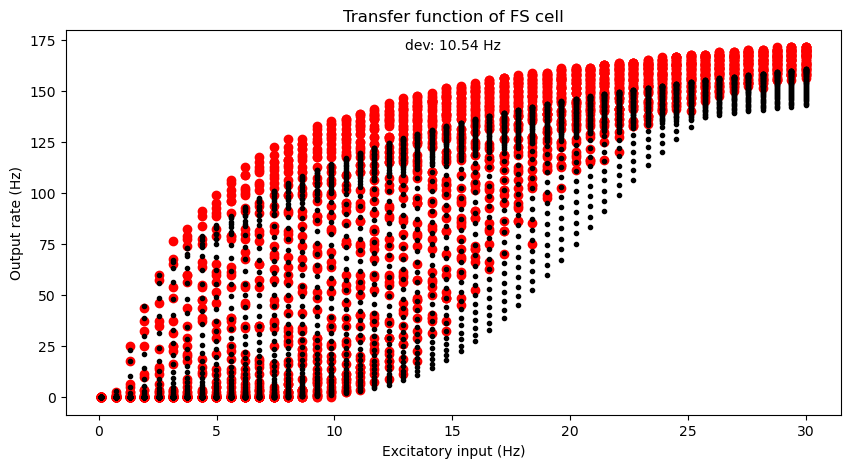

In [24]:
cell = 'FS'
pts = 50
save_name = 'trial'

file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'
adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"
file_fit =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"

# file_fit ='FS-cell_CONFIG1_fit.npy'
param_file = f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy'

P = np.load(file_fit)
plot_check_fit(file, param_file, adapt_file ,cell, P, w_prec=False)

(50, 50)
(50, 50)


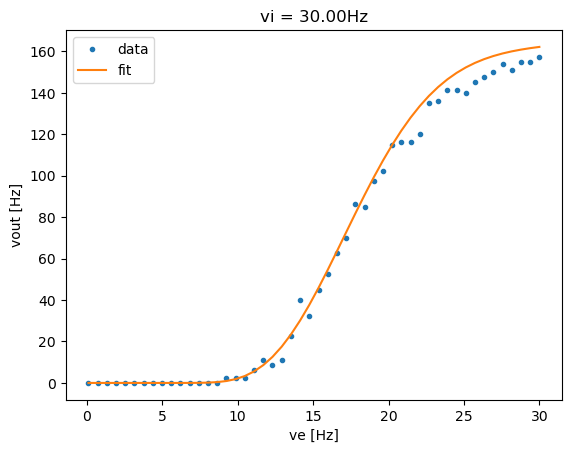

In [ ]:
cell = 'FS'
pts = 50
save_name = 'trial'
# cell_sm = 'inh'
file = f'./data/ExpTF_{pts}x{pts}_{save_name}_{cell}.npy'

adapt_file= f"./data/{pts}x{pts}_{save_name}_{cell}_adapt.npy"
file_fit =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"
# file_fit ='FS-cell_CONFIG1_fit.npy'
# file_fit ='RS-cell0_CONFIG1_fit.npy'
param_file = f'./data/{pts}x{pts}_{save_name}_{cell}_params.npy'

P = np.load(file_fit)
video_check_fit(file, param_file, adapt_file ,cell, P, w_prec=True)

In [ ]:
import subprocess

# Define a list of input values
input_values = [0.5, 2.5, 5, 7.5, 10, 15, 20, 25]

# Loop through the input values and run the script with each value
for input_value in input_values:
    command = f"python adex_simulation_network.py --input {input_value} --time 2000 --save_path './net_compar/' "
    subprocess.run(command, shell=True)


[-0.04983106  0.00506355 -0.02347012  0.00229515 -0.00041053  0.01054705
 -0.03659253  0.00743749  0.00126506 -0.04072161]
cell parameters in SI units


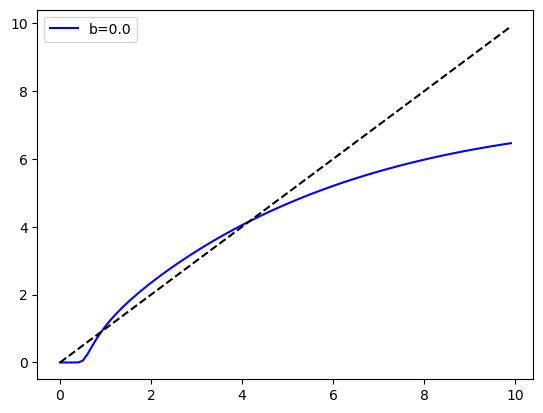

solution =  [4.16009816]
solution nui_fix =  [[9.55870083]]


In [6]:
file_fs= './data/FS-cell_fayc.npy'
# file_fs= "./data/{0}x{1}_{2}_{3}_fit.npy".format(50,50, 'trial', 'FS' )
file_rs ='./data/RS-cellbis_fayc.npy'
pts=50
save_name = 'b_e_0'
cell='RS'
# file_rs =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"


plot_curve(NAME = 'FS-RS_faycal', file_rs =file_rs, file_fs= file_fs, 
               use_new=True, b_e=0e-12)

[-0.05  0.01 -0.04  0.01 -0.   -0.01 -0.06  0.01 -0.   -0.04]
cell parameters in SI units


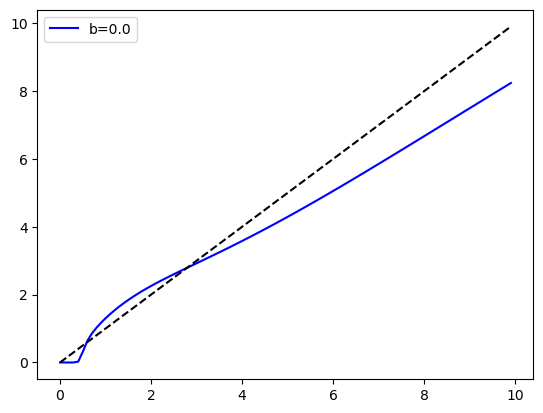

WARNING    /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:333: RuntimeWarning: invalid value encountered in sqrt
  sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm));
 [py.warnings]


2024-05-28 14:24:54,327 - WARNING - py.warnings - /DATA/Maria/paper_pipeline/Tf_calc/theoretical_tools.py:333: RuntimeWarning: invalid value encountered in sqrt
  sV = np.sqrt(fe*(Ue*Te)*(Ue*Te)/2./(Te+Tm)+fi*(Ui*Ti)*(Ui*Ti)/2./(Ti+Tm));



RuntimeError: Failed to converge after 3000 iterations, value is [nan]

In [32]:
file_fs= 'FS-cell_CONFIG1_fit.npy'
file_fs= "./data/{0}x{1}_{2}_{3}_fit.npy".format(50,50, 'trial', 'FS' )
file_rs ='RS-cell0_CONFIG1_fit.npy'
pts=50
save_name = 'b_e_0'
cell='RS'
file_rs =f"./data/{pts}x{pts}_{save_name}_{cell}_fit.npy"


plot_curve(NAME = 'FS-RS_0', file_rs =file_rs, file_fs= file_fs, 
               use_new=True, b_e=0e-12)

In [28]:
CELLS = 'FS-RS'
path_net = "./net_compar/"
fr_both, inputs = load_network_mean(CELLS, path_net)


In [30]:
PRS = np.load(file_rs)
PFS = np.load(file_fs)
PFS = np.load("./data/FS-cell_CONFIG1_fit.npy")
PRS = np.load("./data/RS-cell0_CONFIG1_fit.npy")

calculate_mf_difference(CELLS, fr_both, inputs, PRS, PFS)

cell parameters in SI units
Input =  0.5
starting
cell parameters in SI units
Input =  2.5
starting
cell parameters in SI units
Input =  5.0
starting
cell parameters in SI units
Input =  7.5
starting
cell parameters in SI units
Input =  10.0
starting
cell parameters in SI units
Input =  15.0
starting
cell parameters in SI units
Input =  20.0
starting
cell parameters in SI units
Input =  25.0
starting
Whole difference:  [[ 3.29  1.16  0.5 ]
 [10.91  2.64  2.5 ]
 [17.15  3.43  5.  ]
 [22.49  3.97  7.5 ]
 [27.35  4.33 10.  ]
 [36.36  4.95 15.  ]
 [44.72  5.35 20.  ]
 [52.83  5.79 25.  ]]
mean difference exc:  3.952438762431487
mean difference inh:  26.88845914510574


15.420448953768616